In [1]:
#dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import csv path
csv_calarb = "CalARB_Combined_Updated.csv"

#read in csv files
calarb_df = pd.read_csv(csv_calarb)

In [3]:
#rename rows
calarb_df = calarb_df.rename(columns={'EIC':'Facil_ID','EICSUM':'Facil_Type',
                                      'AREA': 'County','EICSOU':'Source',
                                      'EICSUB':'Substance_sub',
                                      'EICMAT':'Substance'})


In [4]:
#drop all rows with 0 values for pollutant
clean_calarb_df = calarb_df[calarb_df != 0.0000]
clean_calarb_df = clean_calarb_df.dropna()

#drop all rows with waste disposal since it is so small 
clean_calarb_df = clean_calarb_df[clean_calarb_df != 'Waste Disposal']

In [5]:
#groupby County & get sum
county_df = clean_calarb_df.groupby(["County"]).sum()
county_ascending = county_df.sort_values(['2010'], ascending=[False])
county_df = county_df.reset_index()
county_df = county_df.rename(columns={"2010":"county_sum"})
county_ascending

,2010
County,
SACRAMENTO,10.731757
CONTRA COSTA,9.539130
ALAMEDA,8.184122
SAN JOAQUIN,8.051245
SANTA CLARA,7.916813
STANISLAUS,7.264139
MERCED,6.519744
YOLO,5.216258
MADERA,4.974377


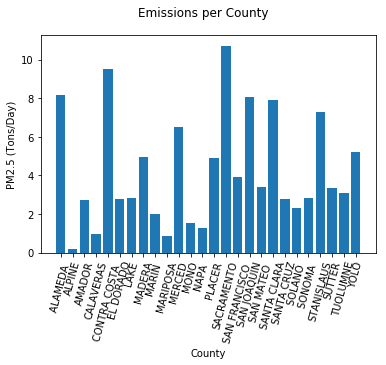

In [6]:
#make bar graph of county_sum
county_sum_plot = plt.bar(county_df['County'], county_df['county_sum'])
county_sum_plot = plt.xticks(county_df['County'], rotation=75)
county_sum_plot = plt.xlabel('County')
county_sum_plot = plt.suptitle('Emissions per County')
county_sum_plot = plt.ylabel('PM2.5 (Tons/Day)')
plt.savefig("county_sum_plot")

In [7]:
#bins were created in the csv file prior to reading it in based on logical catigories of Facil_type

#groupby BIN & get sum
bin_df = clean_calarb_df.groupby(["BIN"]).sum()
bin_df = bin_df.reset_index()

#see sum of emmissions in ascending order to view top poluting sources 
bin_df_ascending = bin_df.sort_values(['2010'], ascending=[False])
bin_df_ascending

,BIN,2010
5,Heating & Power,26.030307
2,Dust & Fire,25.065800
7,Transportation,24.369900
6,Manufacturing,11.710200
0,Agriculture,8.563400
3,Food Processing,6.905600
1,Construction,4.733300
4,Fossil Fuel Production,2.626300


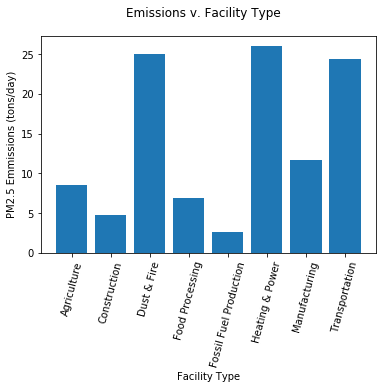

In [8]:
#make bar graph of bin_sum
Facil_sum_plot = plt.bar(bin_df['BIN'], bin_df['2010'])
Facil_sum_plot = plt.xticks(bin_df['BIN'], rotation=75)
Facil_sum_plot = plt.xlabel('Facility Type')
Facil_sum_plot = plt.ylabel('PM2.5 Emmissions (tons/day)')
Facil_sum_plot = plt.suptitle('Emissions v. Facility Type')
plt.savefig('Facil_sum_plot')

In [9]:
#Groupby County and binned categories & get sum
facil_binned = clean_calarb_df.groupby(["County","BIN"]).sum()
facil_binned.to_csv('facil_bin')
facil_binned

2010
County        BIN                             
ALAMEDA       Agriculture             0.015400
              Construction            0.250800
              Dust & Fire             0.941000
              Food Processing         0.695800
              Fossil Fuel Production  0.002700
              Heating & Power         1.433822
              Manufacturing           1.925200
              Transportation          2.860700
ALPINE        Agriculture             0.000500
              Construction            0.025900
              Dust & Fire             0.115100
              Heating & Power         0.012700
              Transportation          0.018700
AMADOR        Agriculture             0.006600
              Construction            0.025300
              Dust & Fire             0.586200
              Food Processing         0.014700
              Heating & Power         0.337148
              Manufacturing           1.638900
              Transportation          0.106000
CALAVERAS     Agriculture             0.006500
              Construction            0.025000
              Dust & Fire             0.325100
              Food Processing         0.017700
              Heating & Power         0.438800
              Manufacturing           0.017800
              Transportation          0.155200
CONTRA COSTA  Agriculture             0.050600
              Construction            0.136500
              Dust & Fire             0.754500
...                                        ...
SONOMA        Manufacturing           0.203700
              Transportation          0.721100
STANISLAUS    Agriculture             2.041500
              Construction            0.180500
              Dust & Fire             1.627000
              Food Processing         0.653300
              Heating & Power         0.892839
              Manufacturing           0.467200
              Transportation          1.386500
SUTTER        Agriculture             0.638600
              Construction            0.072700
              Dust & Fire             0.999200
              Food Processing         0.441000
              Heating & Power         0.646687
              Manufacturing           0.119000
              Transportation          0.423900
TUOLUMNE      Agriculture             0.000600
              Construction            0.048600
              Dust & Fire             1.398300
              Food Processing         0.029400
              Heating & Power         1.102032
              Manufacturing           0.267400
              Transportation          0.247400
YOLO          Agriculture             0.904700
              Construction            1.065600
              Dust & Fire             1.081900
              Food Processing         0.366200
              Heating & Power         0.806358
              Manufacturing           0.371400
              Transportation          0.618500

[185 rows x 1 columns]

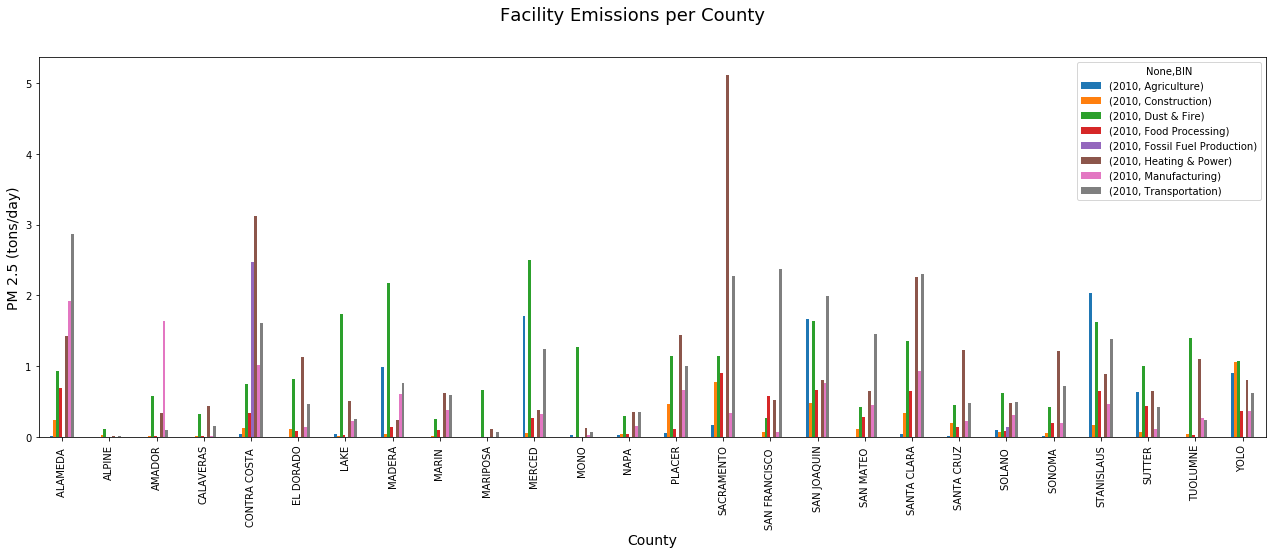

In [10]:
#make bar graph
fig, ax = plt.subplots(figsize=(22,7))
county_facil_plot = plt.ylabel('PM 2.5 (tons/day)', fontsize=14)
county_facil_plot = plt.xlabel('County', fontsize=14)
county_facil_plot = plt.suptitle("Facility Emissions per County",fontsize=18)
county_facil_plot = facil_binned.unstack().plot.bar(ax=ax)
plt.savefig('county_facil_plot')

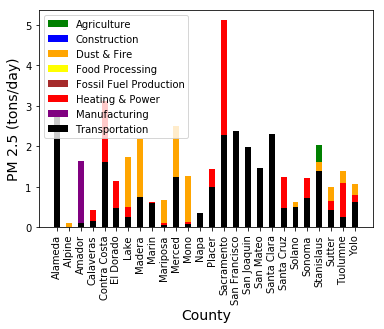

In [11]:
#Plot Stacked Bar Graph 
county = ['Alameda', ' Alpine', 'Amador','Calaveras','Contra Costa','El Dorado','Lake','Madera',
          'Marin','Mariposa','Merced','Mono','Napa','Placer','Sacramento','San Francisco','San Joaquin',
          'San Mateo','Santa Clara','Santa Cruz','Solano','Sonoma','Stanislaus','Sutter','Tuolumne','Yolo']
facil_bin=["Agriculture","Construction","Dust & Fire", "Food Processing", "Fossil Fuel Production","Heating & Power",
          "Manufacturing","Transportation"]

x= np.arange(len(county))

#Sum of bin categories (PM2.5 tons per day)
ag = [0.0154,0.0005,0.0066,0.0065,0.0506,0.0026,0.0418,0.9888,
     0.0087,0,1.7109,0.0255,0.026,0.0583,0.1717,0.0007,1.6622,
     0.0112,0.0452,0.0242,0.1035,0.0171,2.0415,0.6386,0.0006,0.9047]
construction = [0.2508,0.0259,0.0253,0.025,0.1365, 0.116,0.0123,0.0496,
               0.0227,0.0072,0.060,0.0091,0.0411,0.47,0.779,0.0701,0.4868,
               0.118,0.3363,0.1959,0.0721,0.0559,0.1805,0.0727,0.0486,1.0656]
d_f = [0.941,0.1151,0.5862,0.3251,0.7545,0.8186,1.7324,2.1807,
      0.2573,0.6735,2.5021,1.2754,0.2955,1.149,1.148,0.2716,1.6409,
      0.4272,1.3638,0.4505,0.6221,0.4289,1.627,0.9992,1.3983,1.0819]
food = [0.6958,0,0.0147,0.0177,0.3467,0.0851,0.0267,0.1496,
       0.098,0.007,0.2757,0.0066,0.0469,0.115,0.9053,0.5774,0.6654,
       0.2926,0.6541,0.1462,0.0946,0.1948,0.6533,0.441,0.0294,0.3661]
fossil_fuel=[0.0027,0,0,0,2.474,0,0,0,
            0,0,0,0,0,0,0,0,0.0017,
            0,0.003,0,0.1447,0,0,0,0,0]
heating=[1.43382218,0.0127,0.3371483,0.4388,3.11663,1.1394834,0.5148016,0.23957676,
        0.62547,0.1154,0.38524356,0.1258,0.34979336,1.44536388,5.11135724,0.53039894,0.80374502,
        0.6598,2.2581,1.2372,0.4894668,1.21,0.89283878,0.64668672,1.10203174,0.80635844]
manufacturing=[1.9252,0,1.6389,0.0178,1.0129,0.1454,0.2303,0.607,
              0.3864,0.0091,0.3301,0.0343,0.1618,0.6735,0.3379,0.0785,0.7683,
              0.4508,0.9336,0.23,0.3097,0.2037,0.4672,0.119,0.2673,0.3714]
transportation= [2.8607,0.0187,0.106,0.1552,1.6177,0.4678,0.2567,0.7589,
                0.6021,0.0687,1.2522,0.0776,0.3592,1.0031,2.2696,2.3772,1.9896,
                1.4579,2.3025,0.4782,0.4928,0.7211,1.3865,0.4239,0.24739,0.618499999999998]

bar_width = 0.5

#plot stacked bar graph
plt.bar(x,ag,bar_width, color='green')
plt.bar(x,construction,bar_width,color='blue')
plt.bar(x,d_f,bar_width,color='orange')
plt.bar(x,food,bar_width,color='yellow')
plt.bar(x,fossil_fuel,bar_width,color='brown')
plt.bar(x,heating,bar_width,color='red')
plt.bar(x,manufacturing,bar_width,color='purple')
plt.bar(x,transportation,bar_width,color='black')

plt.xticks(x, county, rotation='vertical')
plt.xlabel('County', fontsize=14)
plt.ylabel('PM 2.5 (tons/day)', fontsize=14)
#plt.title('Group Barchart - Happiness index across cities By Gender',fontsize=18)
plt.legend(facil_bin,loc=2)
plt.figure(figsize=(40,30),dpi=240)
plt.show()

In [12]:
#groupby binned categories and Facil_Type & get sum
bin_facil_df = clean_calarb_df.groupby(["BIN","Facil_Type"]).sum()
bin_facil_df

2010
BIN                    Facil_Type                                                
Agriculture            052-FOOD AND AGRICULTURAL PROCESSING              0.497700
                       140-SOIL REMEDIATION                              0.025800
                       620-FARMING OPERATIONS                            8.039900
Construction           540-ASPHALT PAVING / ROOFING                      0.007900
                       630-CONSTRUCTION AND DEMOLITION                   4.725400
Dust & Fire            640-PAVED ROAD DUST                               6.271800
                       645-UNPAVED ROAD DUST                             4.120700
                       650-FUGITIVE WINDBLOWN DUST                       5.168000
                       660-FIRES                                         0.350900
                       670-MANAGED BURNING AND DISPOSAL                  8.898800
                       699-OTHER (MISCELLANEOUS PROCESSES)               0.255600
Food Processing        420-FOOD AND AGRICULTURE                          1.300200
                       690-COOKING                                       5.605400
Fossil Fuel Production 040-PETROLEUM REFINING (COMBUSTION)               2.386400
                       320-PETROLEUM REFINING                            0.239700
                       330-PETROLEUM MARKETING                           0.000200
Heating & Power        010-ELECTRIC UTILITIES                            0.957800
                       020-COGENERATION                                  1.096100
                       030-OIL AND GAS PRODUCTION (COMBUSTION)           0.015600
                       060-SERVICE AND COMMERCIAL                        1.420300
                       099-OTHER (FUEL COMBUSTION)                       0.130807
                       610-RESIDENTIAL FUEL COMBUSTION                  22.409700
Manufacturing          050-MANUFACTURING AND INDUSTRIAL                  1.231000
                       210-LAUNDERING                                    0.000100
                       220-DEGREASING                                    0.038200
                       230-COATINGS AND RELATED PROCESS SOLVENTS         0.110300
                       240-PRINTING                                      0.000500
                       250-ADHESIVES AND SEALANTS                        0.000100
                       299-OTHER (CLEANING AND SURFACE COATINGS)         0.005800
                       410-CHEMICAL                                      0.720400
...                                                                           ...
                       499-OTHER (INDUSTRIAL PROCESSES)                  2.987700
Transportation         710-LIGHT DUTY PASSENGER (LDA)                    3.121000
                       722-LIGHT DUTY TRUCKS - 1 (LDT1)                  0.418900
                       723-LIGHT DUTY TRUCKS - 2 (LDT2)                  1.062300
                       724-MEDIUM DUTY TRUCKS (MDV)                      0.877500
                       732-LIGHT HEAVY DUTY GAS TRUCKS - 1 (LHDGT1)      0.240900
                       733-LIGHT HEAVY DUTY GAS TRUCKS - 2 (LHDGT2)      0.029800
                       734-MEDIUM HEAVY DUTY GAS TRUCKS (MHDGT)          0.044200
                       736-HEAVY HEAVY DUTY GAS TRUCKS (HHDGT)           0.002400
                       742-LIGHT HEAVY DUTY DIESEL TRUCKS - 1 (LHDDT1)   0.417300
                       743-LIGHT HEAVY DUTY DIESEL TRUCKS - 2 (LHDDT2)   0.109900
                       744-MEDIUM HEAVY DUTY DIESEL TRUCKS (MHDDT)       1.820700
                       746-HEAVY HEAVY DUTY DIESEL TRUCKS (HHDDT)        4.438000
                       750-MOTORCYCLES (MCY)                             0.017700
                       760-HEAVY DUTY DIESEL URBAN BUSES (UBD)           0.679800
                       762-HEAVY DUTY GAS URBAN BUSES (UBG)              0.008700
                       771-SCHOOL BUSES - GAS (SBG)        

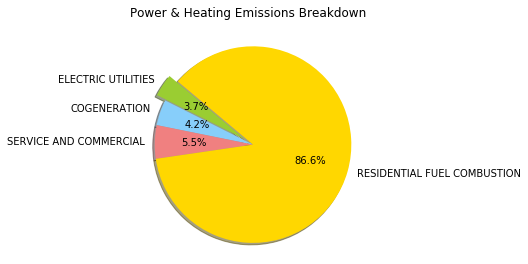

In [16]:
#create dictionary snapshot of Power&Heating

power_heating = {"ELECTRIC UTILITIES":0.957800, 'COGENERATION':1.096100,
                 'SERVICE AND COMMERCIAL':1.420300,"RESIDENTIAL FUEL COMBUSTION":22.409700}

# Data to plot
labels = 'ELECTRIC UTILITIES', 'COGENERATION','SERVICE AND COMMERCIAL',"RESIDENTIAL FUEL COMBUSTION"
sizes = [0.9578, 1.0961, 1.420300, 22.4097]
colors = ['yellowgreen','lightskyblue','lightcoral','gold',]
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
power_heating_plot = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
power_heating_plot = plt.suptitle("Power & Heating Emissions Breakdown")
power_heating_plot = plt.axis('equal')
plt.savefig("power_heating_plot")

In [14]:
#Create dataframe with snapshot of Transportation Facil_types
transportation_df = bin_facil_df.loc['Transportation', :]
transportation_df

,2010
Facil_Type,
710-LIGHT DUTY PASSENGER (LDA),3.1210
722-LIGHT DUTY TRUCKS - 1 (LDT1),0.4189
723-LIGHT DUTY TRUCKS - 2 (LDT2),1.0623
724-MEDIUM DUTY TRUCKS (MDV),0.8775
732-LIGHT HEAVY DUTY GAS TRUCKS - 1 (LHDGT1),0.2409
733-LIGHT HEAVY DUTY GAS TRUCKS - 2 (LHDGT2),0.0298
734-MEDIUM HEAVY DUTY GAS TRUCKS (MHDGT),0.0442
736-HEAVY HEAVY DUTY GAS TRUCKS (HHDGT),0.0024
742-LIGHT HEAVY DUTY DIESEL TRUCKS - 1 (LHDDT1),0.4173


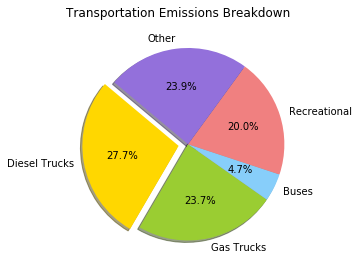

In [15]:
#Pie chart of catagories of Transportation types 

# Data to plot
vehicles = 'Diesel Trucks', 'Gas Trucks', 'Buses', 'Recreational', 'Other'
emissions = [6.7859, 5.7946, 1.146, 4.9116, 5.8599]

labels = vehicles
sizes = emissions
colors = ['gold', 'yellowgreen','lightskyblue','lightcoral', 'mediumpurple']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
transportation_plot = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
transportation_plot = plt.suptitle("Transportation Emissions Breakdown")
transportation_plot = plt.axis('equal')
plt.savefig("transportation_plot") 